In [1]:
from miscpy.utils.sympyhelpers import *
init_printing()

![Orbit Diagram](img/orbit_all_frames1.png)

In [2]:
a,n,mu,r,e,h = symbols("a,n,mu,r,e,h",positive=True)
ed,I,Id,O,Od,w,wd,th,thd,hd,t,f_r,f_th,f_h,v_r,v_th,nu = \
symbols("edot,I,Idot,Omega,Omegadot,omega,omegadot,\
theta,thetadot,hdot,t,f_r,f_theta,f_h,v_r,v_theta,nu",real=True)

Define required rotation matrices ($\Omega$ rotation about $\mathbf{\hat{e}}_3$, $I$ about $\mathbf{\hat{n}}$ and $\theta$ rotation about $\mathbf{\hat{h}}$)

In [3]:
rot1 = Matrix(([cos(O),sin(O),0],[-sin(O),cos(O),0],[0,0,1]))
rot2 = Matrix(([1,0,0],[0,cos(I),sin(I)],[0,-sin(I),cos(I)]))
rot3 = Matrix(([cos(th),sin(th),0],[-sin(th),cos(th),0],[0,0,1]))

$^\mathcal{I}\boldsymbol{\omega}^\mathcal{B} = \dot\Omega \mathbf{\hat{e}}_3 + \dot I \mathbf{\hat{n}} + \dot\theta \mathbf{h}$

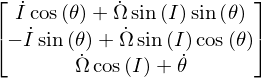

In [4]:
IwB = rot3*rot2*Matrix([0,0,Od])+ rot3*Matrix([Id,0,0]) + Matrix([0,0,thd]); IwB

$\frac{^\mathcal{I}\textrm{d}\mathbf{h}}{\textrm{d}t} = \frac{^\mathcal{B}\textrm{d}\mathbf{h}}{\textrm{d}t} + {}^\mathcal{I}\boldsymbol{\omega}^\mathcal{B} \times \mathbf{h} = \mathbf{r}\times \mathbf{f}$

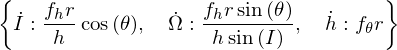

In [5]:
hvec = Matrix([0,0,h])
dhdt1 = difftotalmat(hvec,t,{h:hd}) + IwB.cross(hvec)
rvec = Matrix([r,0,0])
fvec = Matrix([f_r,f_th,f_h])
dhdt2 = rvec.cross(fvec)
sol1 = solve(dhdt1-dhdt2,[hd,Od,Id]); sol1


$\frac{^\mathcal{I}\textrm{d}\mathbf{e}}{\textrm{d}t} = \frac{1}{\mu}\left(\mathbf{f} \times \mathbf{h} + \mathbf{v} \times \mathbf{r} \times \mathbf{f}\right)$

In [6]:
evec = Matrix([e*cos(th - w),-e*sin(th - w),0])
dedt1 = simplify(difftotalmat(evec,t,{e:ed,th:thd,w:wd})+ IwB.cross(evec))
vvec = Matrix([v_r,v_th,0])
dedt2 = (fvec.cross(hvec) + vvec.cross(rvec.cross(fvec)))/mu
dedt3 = simplify(dedt1.subs([(Od,f_h*r*sin(th)/(h*sin(I))),(Id,f_h*r*cos(th)/h),(w,th-nu)]))

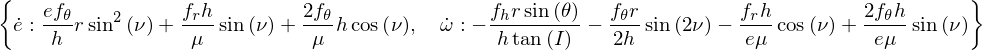

In [7]:
sol2 = solve(dedt3 - dedt2.subs(r*v_th,h).subs(v_r,mu/h*e*sin(nu)),[ed,wd]); sol2

$^\mathcal{I}\boldsymbol{\omega}^\mathcal{B} \cdot \mathbf{\hat{h}} = \frac{v_\theta}{r}$

In [8]:
IwB.dot(Matrix([0,0,1]))

$h = \sqrt{\mu a (1 - e^2)}$

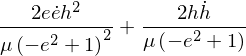

In [9]:
ad = difftotal(h**2/mu/(1 - e**2),t,{h:hd,e:ed}); ad

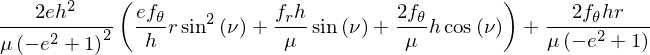

In [10]:
ad = ad.subs(hd,sol1[hd]).subs(ed,sol2[ed]).subs(v_r,mu/h*e*sin(nu));ad

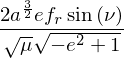

In [11]:
simplify(ad.subs(f_th,0).subs(h,sqrt(mu*a*(1-e**2))))

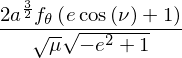

In [12]:
simplify(ad.subs(f_r,0).subs(h,sqrt(mu*a*(1-e**2))).subs(r,a*(1-e**2)/(1+e*cos(nu))))